In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt  # some imports to set up plotting

In [4]:
path_to_file = '/Users/Ksenia/Desktop/cmder/flight_delays.csv'
df = pd.read_csv(path_to_file,sep=',' )
f = df[(df['dep_delayed_15min'] == 'N')]
f

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


### Доля всех задержек ко всем вылетам

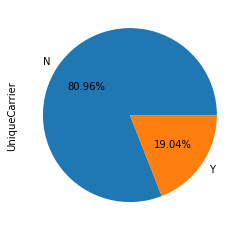

In [4]:
df.groupby('dep_delayed_15min')['UniqueCarrier'].count().plot(kind='pie', autopct='%1.2f%%')

### Зависимость количества задержек от длины пути, который предстоит пролететь самолёту

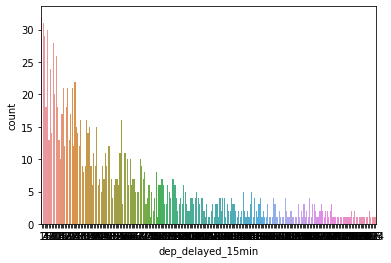

In [188]:
sns.countplot(f.groupby('Distance')['dep_delayed_15min'].count())

### Сгруппируем вылеты по расстоянию i <= Distance<= i+100

In [6]:
f['Distance'].max()

4962

In [39]:
Dist = [i for i in range(0, 5100, 100)]
Numbers = []
for i in range(len(Dist)-1):
    a = f[(f['Distance'] >= Dist[i])&(f['Distance'] <= Dist[i+1])]['dep_delayed_15min'].count()
    Numbers.append(a)
c = pd.DataFrame({'Count': Numbers}, index =Dist[1::])

,Count
100,1596
200,7220
300,10285
400,9783
500,7665


Text(0, 0.5, 'Count')

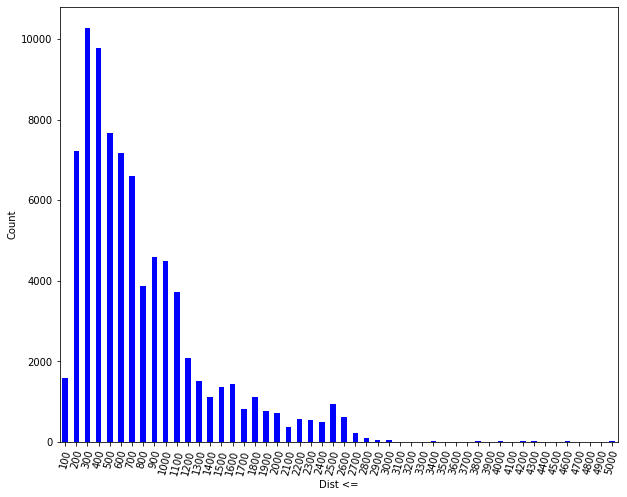

In [41]:
plt.figure(figsize=(10,8)) 
G = c['Count'].plot(kind='bar', rot=75, color='blue')
G.set_xlabel("Dist <=")
G.set_ylabel("Count")
#plt.ylim([19000, 21000])


### Зависимость количества задержек по месяцам

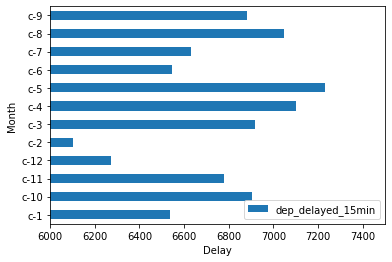

In [180]:
Delay_per_month = f.groupby('Month')['dep_delayed_15min'].count().plot(kind='barh')
plt.xlim([6000, 7500])
Delay_per_month.set_xlabel("Delay number")
Delay_per_month.legend()

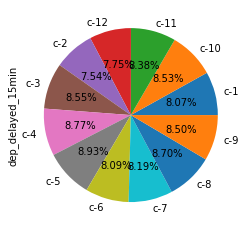

In [5]:
f.groupby('Month')['dep_delayed_15min'].count().plot(kind='pie', autopct='%1.2f%%')

### Время года, в которое произошло наибольшее число задержек

,delay
winter,19557
spring,20879
summer,20564
autumn,20569


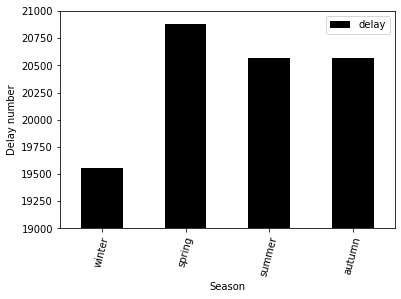

In [193]:
F = f.groupby('Month')['dep_delayed_15min'].count()

season_begins =[1, 4, 7, 9]
season_name = ['winter','spring', 'summer', 'autumn']
data = []
for i in season_begins:
    season = sum([F[f'c-{i+u}'] for u in range(3)])
    data.append(season)

data1 = pd.DataFrame(data, index =season_name, columns =['delay'])

Smth = data1.plot(kind='bar', rot=75, color='black');
Smth.set_xlabel("Season")
Smth.set_ylabel("Delay number")
plt.ylim([19000, 21000])

data1.head()


### Топ 5 месяцев, в которые происходит задержка

(6000, 8000)

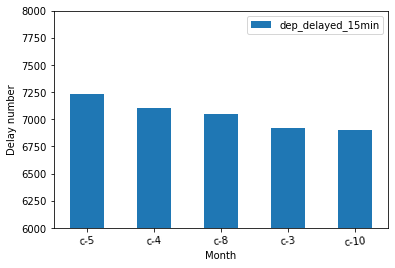

In [200]:
d1 = f.groupby('Month')['dep_delayed_15min'].count()
d1 = pd.DataFrame(d1).sort_values(by='dep_delayed_15min',ascending=False).head(5)

Smth_next = d1.plot(kind='bar', rot=5)
Smth_next.set_ylabel("Delay number")
plt.ylim([6000, 8000])

### Топ худших компаний

Text(0, 0.5, 'Delay number')

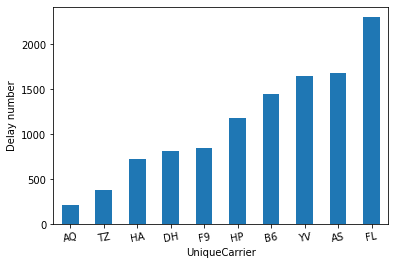

In [205]:
Smth_after = f.groupby('UniqueCarrier')['dep_delayed_15min'].count().sort_values(ascending=True).head(10)
Smth_after = Smth_after.plot(kind="bar", rot=10, fontsize=10)
Smth_after.set_ylabel("Delay number")

### Топ 10 аэропортов, на которые есть задержка

Text(0, 0.5, 'Delay number')

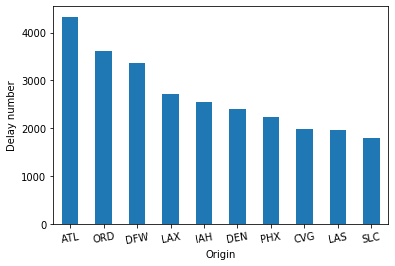

In [203]:
p1 = f.groupby('Origin')['dep_delayed_15min'].count().sort_values(ascending=False).head(10)
Smth_after_that = p1.plot(x="Origin", y="Delay", kind="bar", rot=10, fontsize=10)
Smth_after_that.set_ylabel("Delay number")
#по убыванию

### Топ 5 направлений, на которые есть задержка

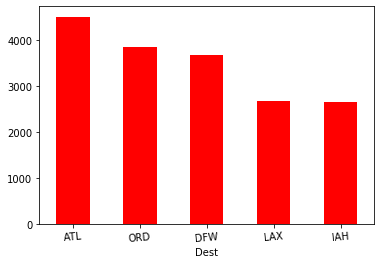

In [173]:
p11 = f.groupby('Dest')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)
p11.plot(kind="bar", rot=5, fontsize=10, color = 'red')

### Необычная зависимость

# она есть!

#### это все